In [1]:
# ***********************************************************
# SCAN ON EP TEMPERATURE: DIRECT and MPR DIAGNOSTIC
# ***********************************************************

In [2]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [34]:
run main_NLED31213

<IPython.core.display.Javascript object>


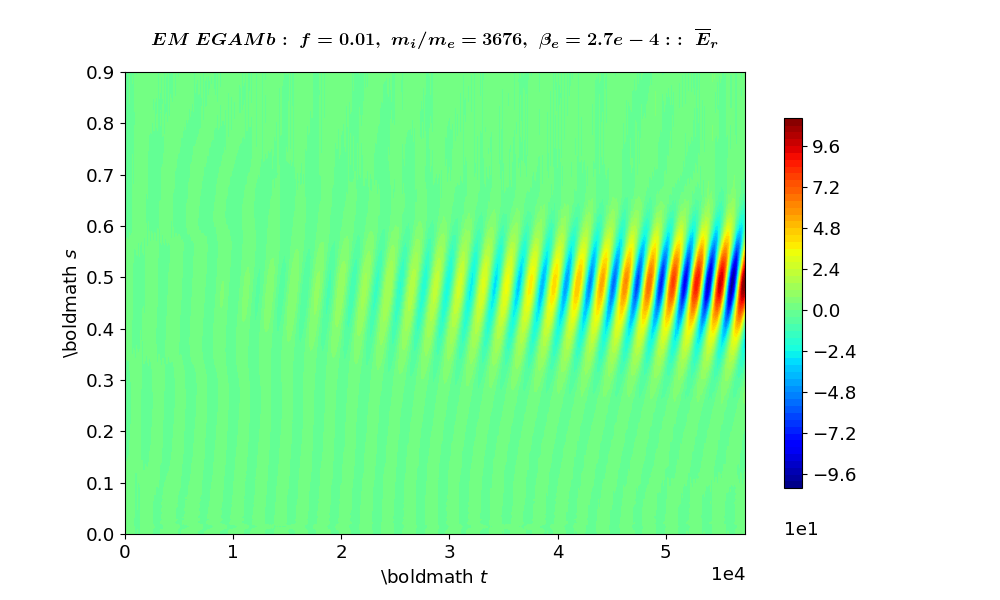

<IPython.core.display.Javascript object>


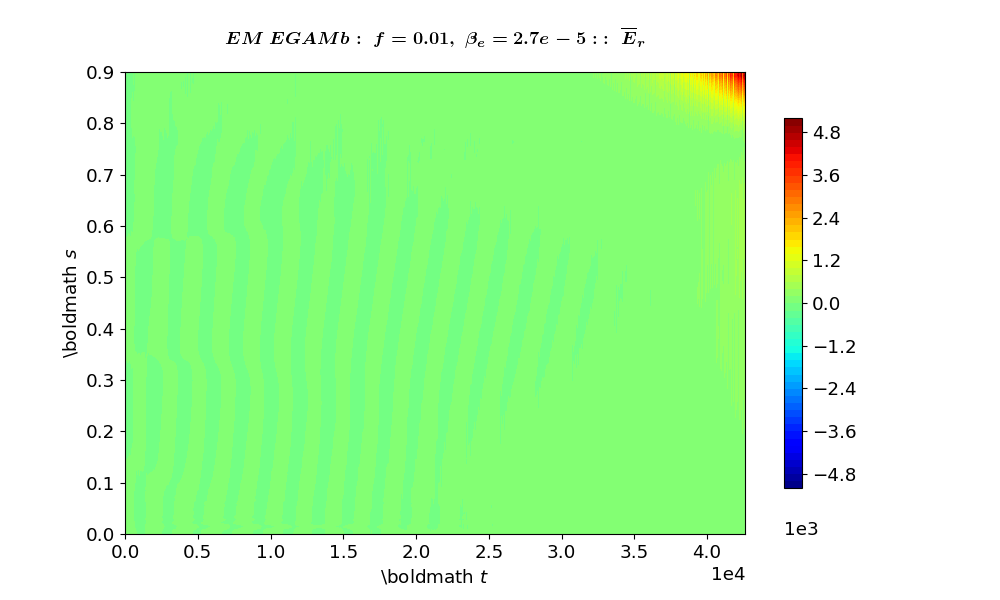

In [35]:
# *******************
# *** PLOT: (t,s) ***
# *******************
reload()

npr = 2

oo_ts = {
    'ovars': [
        ['zonal', 'erbar'], 
    ] * npr,
    'avrs': [
        ['ts']
    ] * npr,
#     'dds': [b025k_f001_mie500, b025k_f001_mie1000, b025k_f001_mie2000, b025k_f001],
    'dds': [b025k_f001, b025k_f001_bm5],
#     'var_legs1': ['f = 0.01'],
}

oo_ts.update({
#      't_start': 6e4,
#     't_end': 6.3e4,
#      's_start': 0.4, 's_end': 0.7,
})

common.plot_vars_2d(oo_ts)

<IPython.core.display.Javascript object>


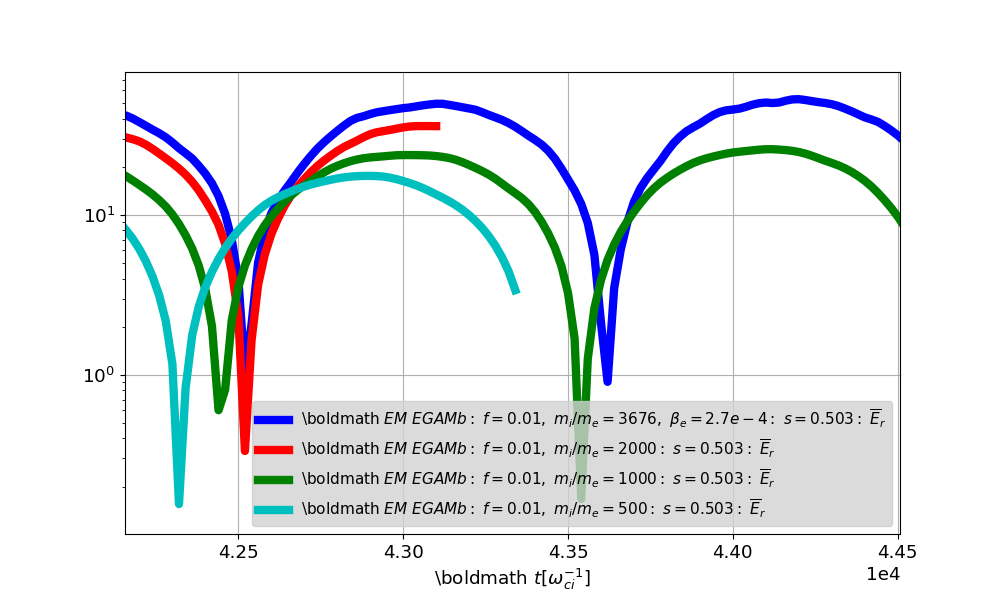

In [8]:
# ***********************
# *** PLOT: (t) at s1 ***
# ***********************
reload()

npr = 4
s1 = 0.50

oo_t_s1 = {
    'ovars': [
        ['zonal', 'erbar'],
    ]*npr,
    'avrs': [
        ['ts', 'point-s', [s1]],
    ]*npr,
    'dds': [b025k_f001, b025k_f001_mie2000, b025k_f001_mie1000, b025k_f001_mie500],
    'flag_semilogy': True,
    'stys': ['-', '-', '-', '-'],
    'labx': 't[\omega_{ci}^{-1}]',
#     'var_legs1': ['f = 0.05'],
#     'var_legs2': ['dt=10'],
#     'var_legs3': ['dt=20'],
    'x_start': 1e4, 
#     'x_end': 4.3e4,
}
common.plot_vars_1d(oo_t_s1)

<IPython.core.display.Javascript object>


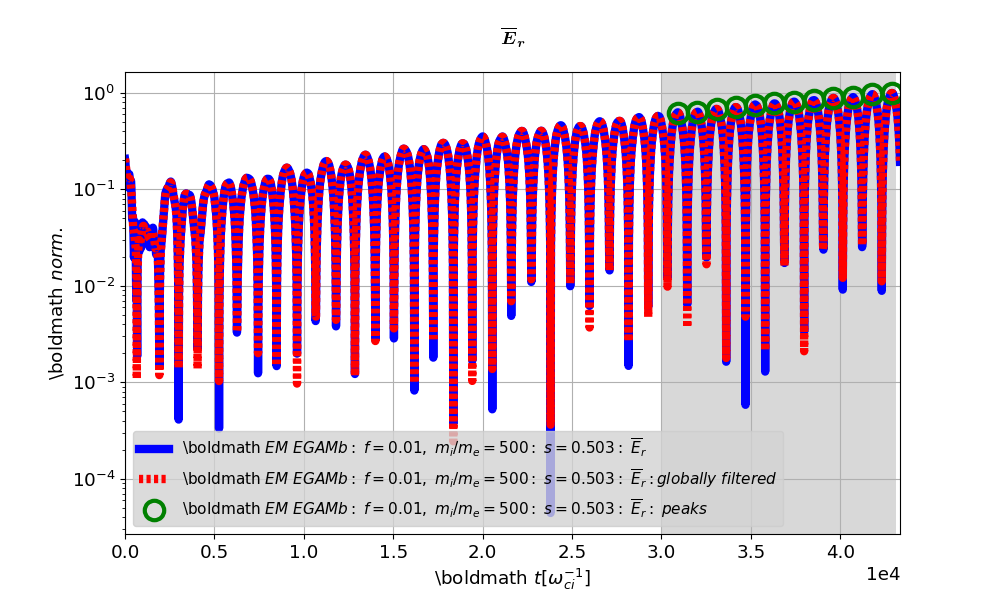

<IPython.core.display.Javascript object>


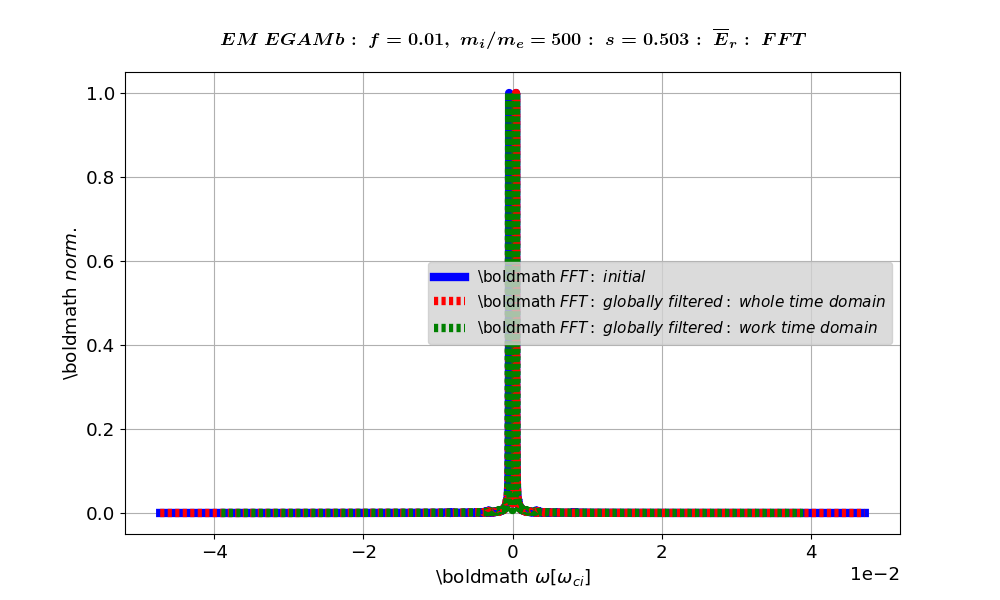

<IPython.core.display.Javascript object>


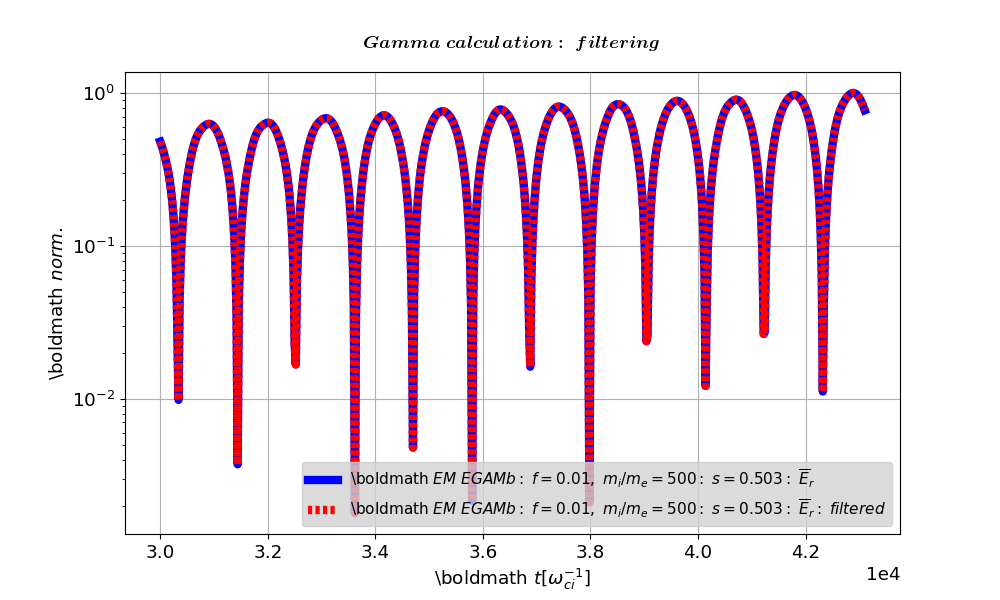

<IPython.core.display.Javascript object>


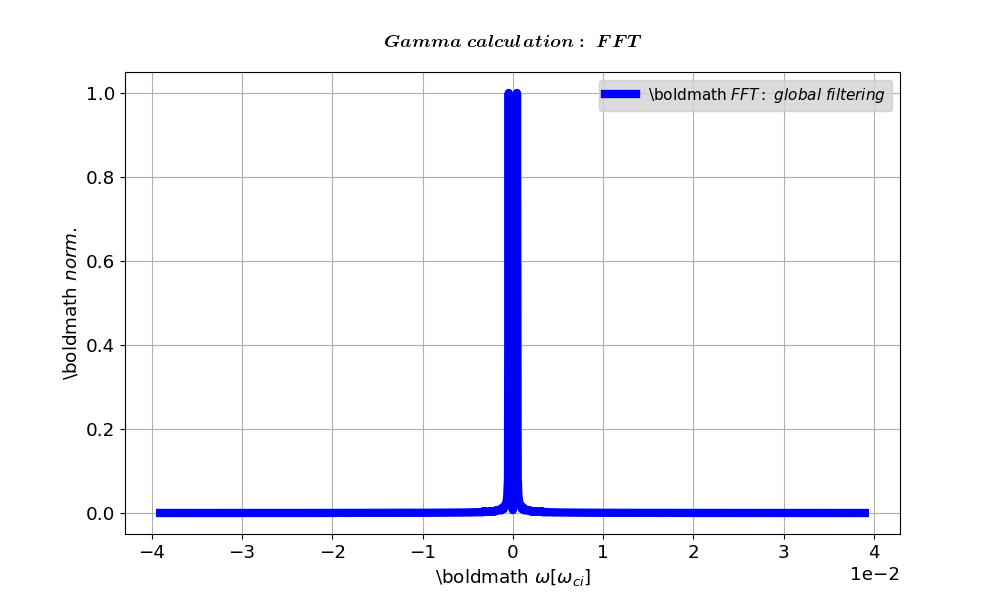

<IPython.core.display.Javascript object>


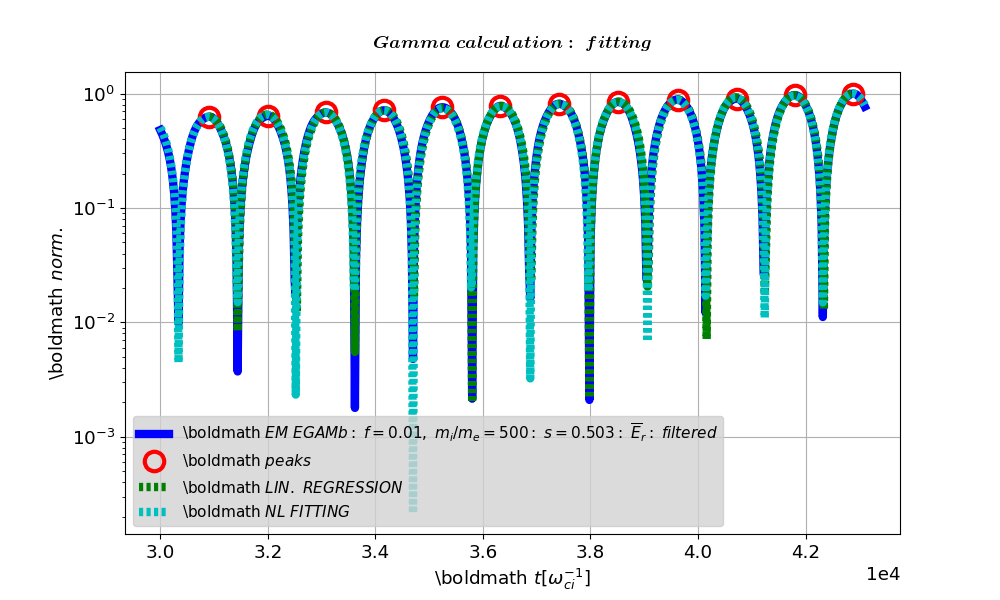

<IPython.core.display.Javascript object>


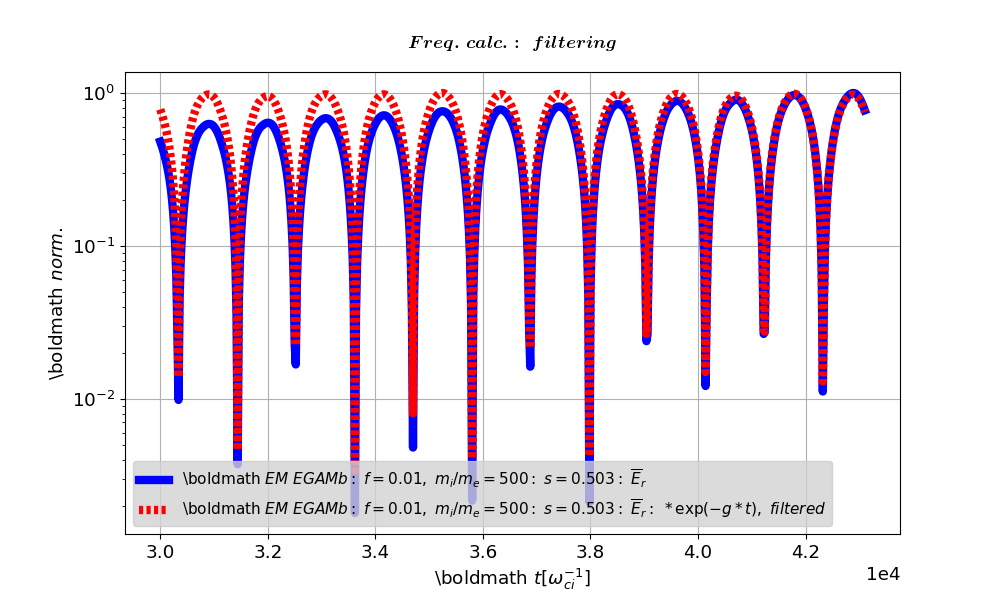

<IPython.core.display.Javascript object>


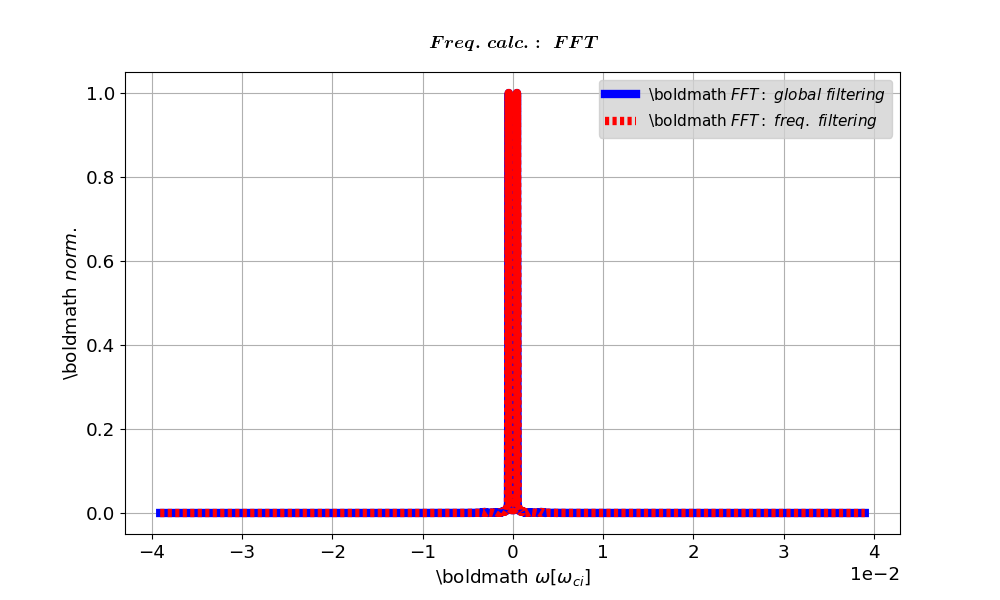

<IPython.core.display.Javascript object>


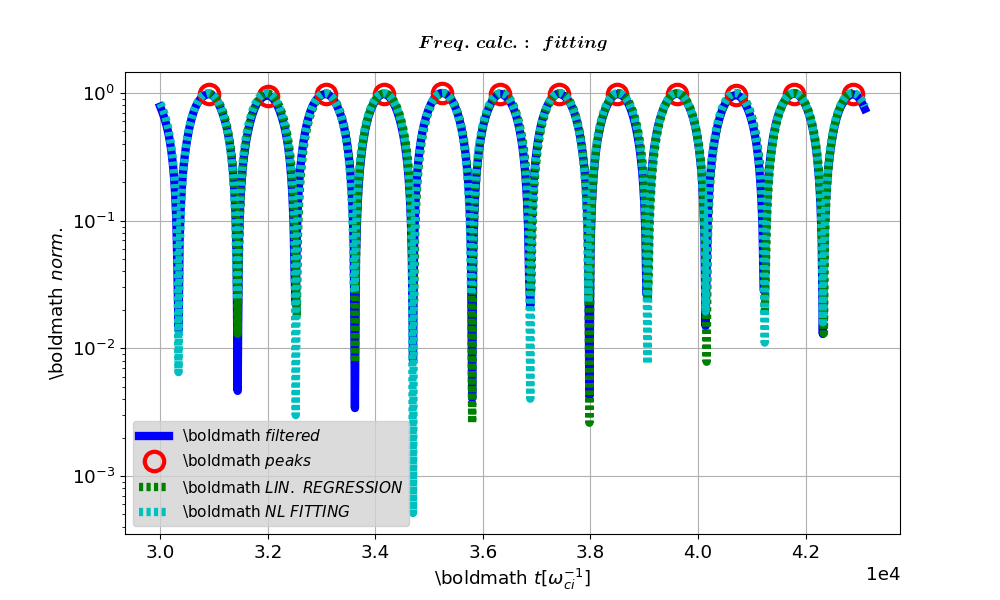

--- NAIVE CALCULATION ---
- GAMMA: ESTIMATION -
prel. w[wci] = 2.885e-03
g[wci] = 3.974e-05 +- 7.877e-07
- GAMMA: NL FITTING -
prel. w[wci] = 2.884e-03 +- 4.997e-07
g[wci] = 3.901e-05 +- 4.912e-07
- FREQUENCY: ESTIMATION -
w[wci] = 2.885e-03
(g_real - g_num)[wci] = 7.825e-07 +- 6.255e-07
- FREQUENCY: NL FITTING -
w[wci] = 2.884e-03 +- 4.986e-07
(g_real - g_num)[wci] = 3.716e-07 +- 4.962e-07
All chosen time intervals are unique.


<IPython.core.display.Javascript object>


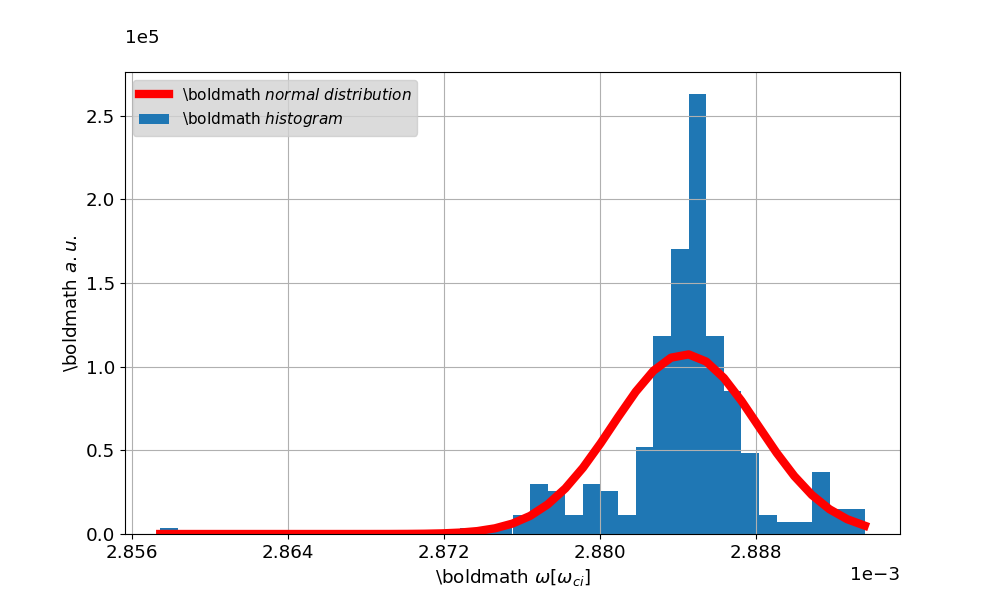

<IPython.core.display.Javascript object>


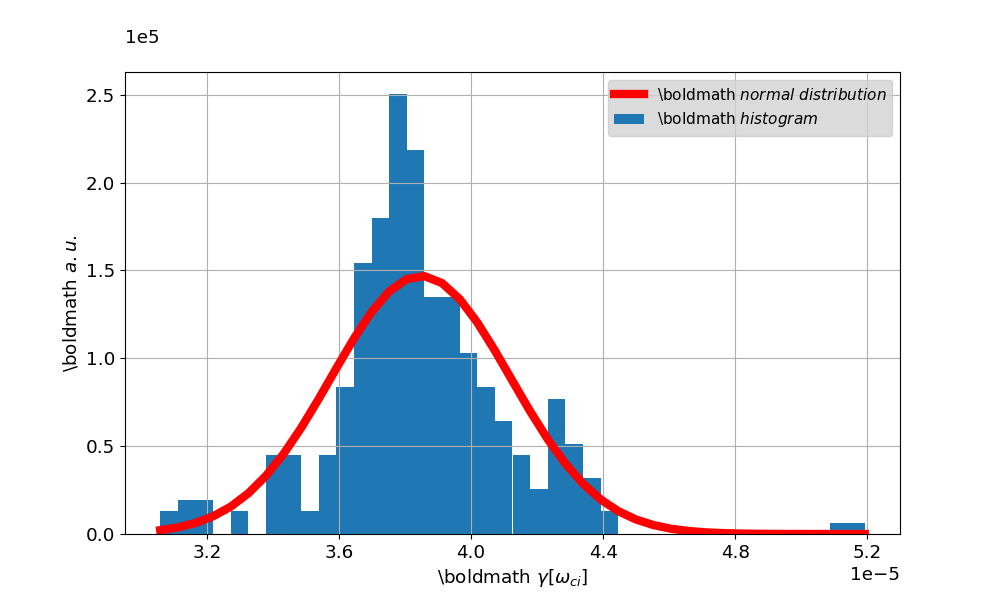

--- STATISTICS ---
number of frequency samples = 299
number of rate samples = 292
w[wci] = 2.884e-03+-7.278e-06
g[wci] = 3.848e-05+-5.323e-06


{'naive': {'w_est': 0.0028846009340140004,
  'g_est': 3.973687375918172e-05,
  'w_adv': 0.0028838125683316816,
  'g_adv': 3.901033120042791e-05},
 'stat': {'w': 0.0028843855477616214,
  'err_w': 7.2776504125548726e-06,
  'g': 3.847530641348079e-05,
  'err_g': 5.322535383291735e-06}}

In [16]:
# ***************************************************
# *** DIRECT METHOD: FIND FRQUENCY and GAMMA (s1) ***
# ***************************************************
reload()

s1 = 0.50

dd_current = dict(b025k_f001_mie500)
# dd_current = dict(b025k_f001_mie1000)
# dd_current = dict(b025k_f001_mie2000)
# dd_current = dict(b025k_f001)

tmin, tmax = 3e4, 4.31e4 
min_n_peaks, threshold_w, threshold_g = 4, 0.1, 0.1
n_samples = 300
sel_norm = 'wc'

filt_global = {
    'sel_filt': 'smooth', 
    'wind': 7, 
}
filt_freq = {
    'sel_filt': 'smooth', 
    'wind': 7, 
}

oo_var = {
    'ovars': [['zonal', 'erbar']],
    'avrs': [['ts', 'point-s', [s1]]],
    'dds': [dd_current],
#     'sel_legs1': 'woPr',
}

oo_wg = {
    # BASIC
    't_work': [tmin, tmax], 
    'flag_two_stages': True,
#     'sel_norm': 'vt',
    # FILTERING
    'filt_global': filt_global, 
    'filt_freq':   filt_freq,
    # STATISTICS
    'flag_stat':   True,
    'n_samples':   n_samples,
    'min_n_peaks': min_n_peaks,
    'threshold_w': threshold_w,
    'threshold_g': threshold_g,
    'sel_norm': sel_norm,
}

oo_plot = {
#     't_plot': [0.15e4, 1.5e4],
    'flag_norm': True,
    'flag_semilogy': True
}

common.calc_wg(oo_var, oo_wg, oo_plot)

<IPython.core.display.Javascript object>


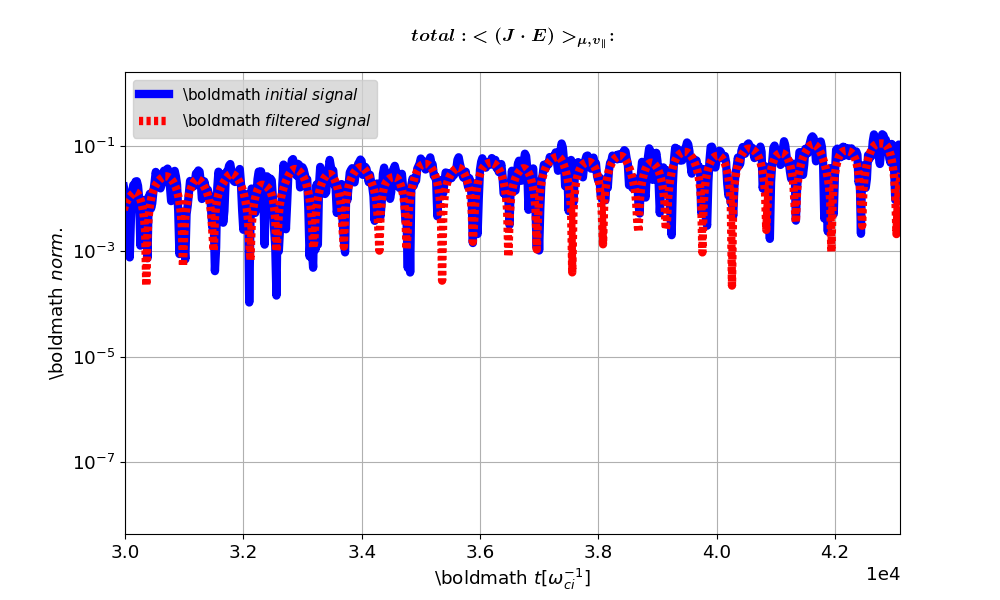

<IPython.core.display.Javascript object>


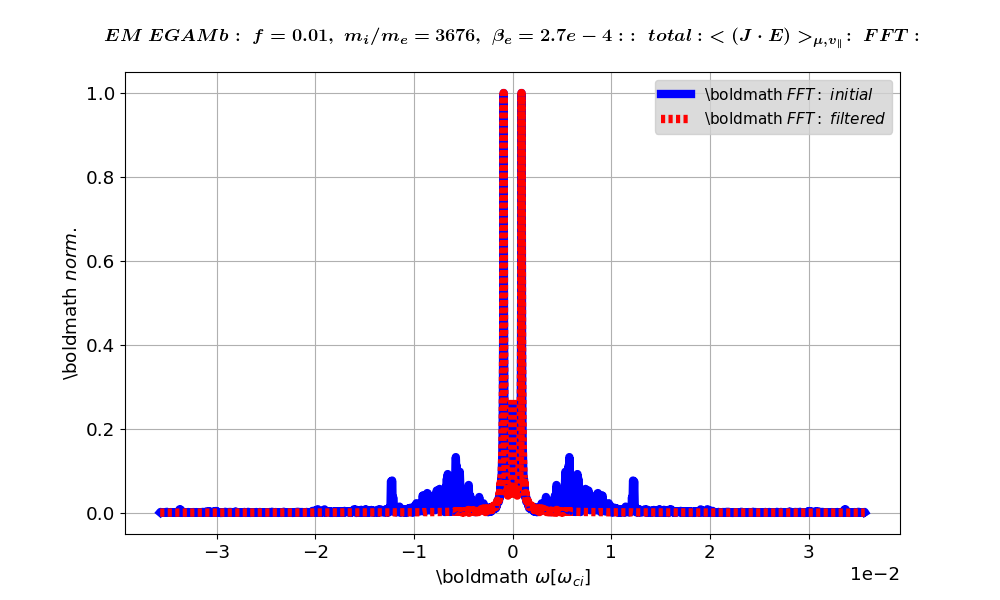

<IPython.core.display.Javascript object>


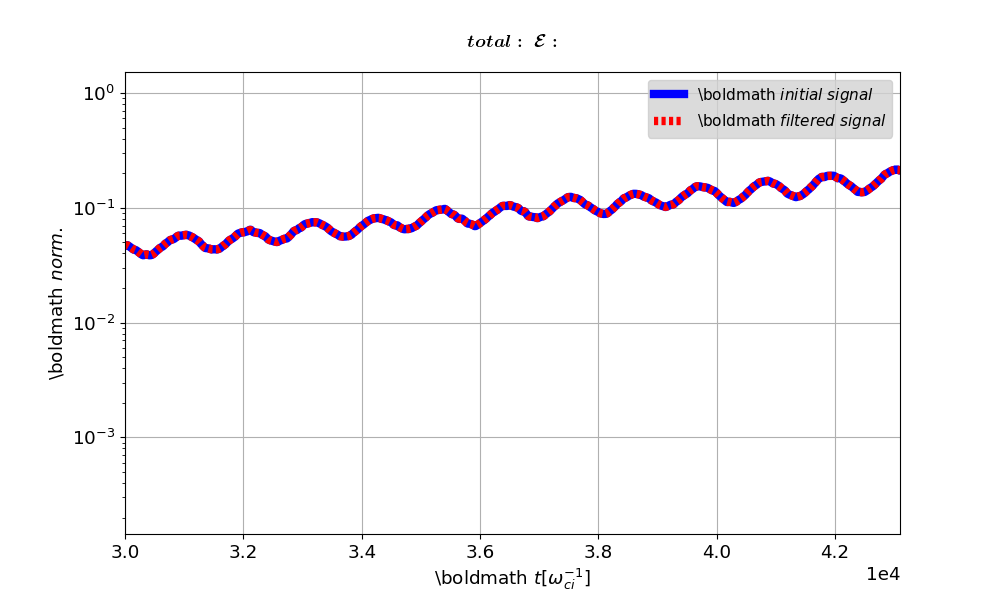

<IPython.core.display.Javascript object>


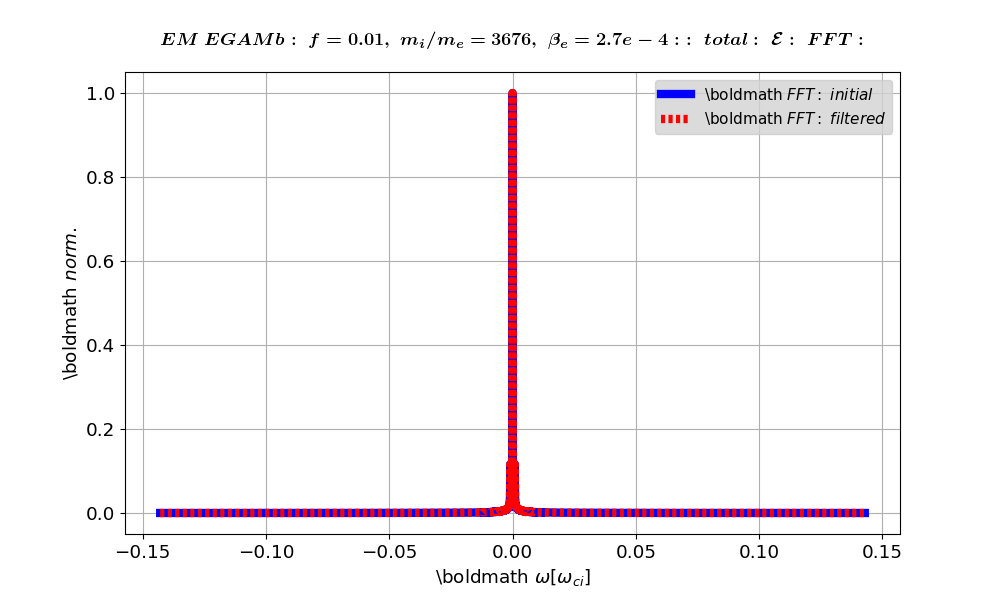

<IPython.core.display.Javascript object>


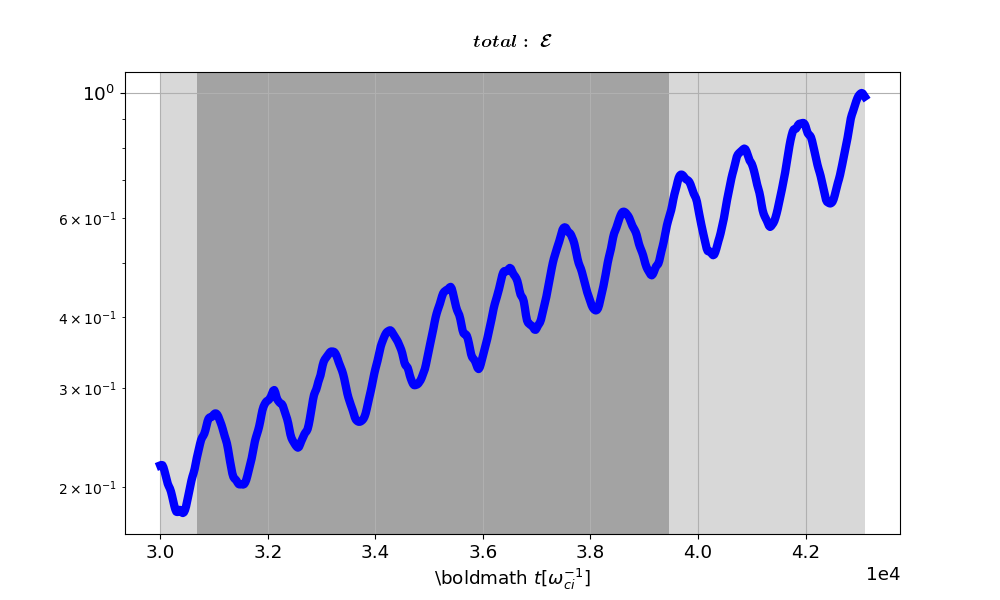

<IPython.core.display.Javascript object>


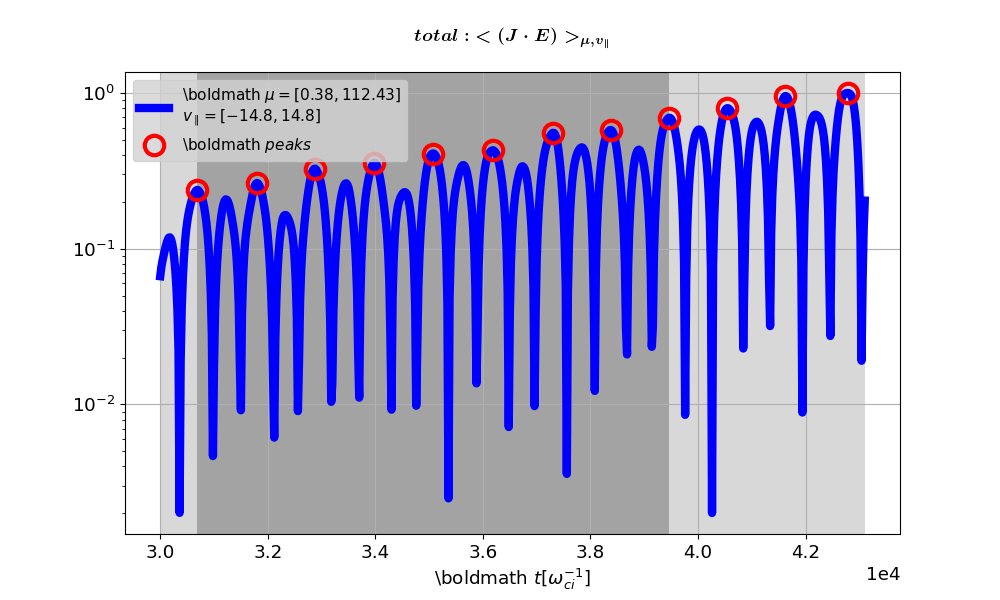

All chosen time intervals are unique.


<IPython.core.display.Javascript object>


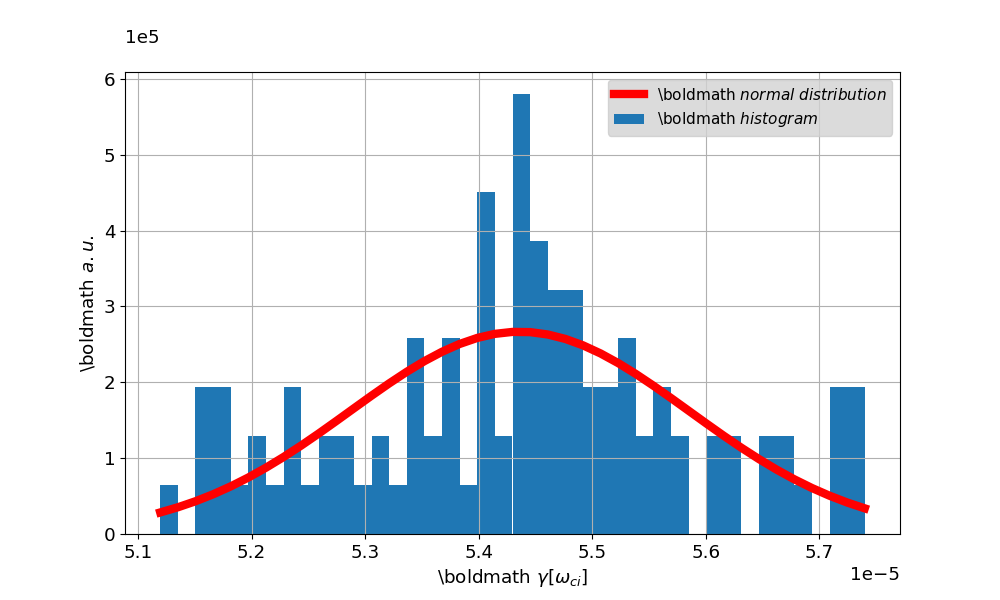

velocity domain: \mu = [0.38, 112.43]$
$ v_{\parallel} = [-14.8, 14.8]
total: Initial: g[wci] = 5.599e-05
total: Statistics: g[wci] = 5.436e-05+-2.933e-06



In [31]:
# ***********
# *** MPR ***
# ***********
reload()

gam_g = None

species_name, flag_inv_peaks = 'total', True
# species_name, flag_inv_peaks = 'deuterium', False
# species_name, flag_inv_peaks = 'electrons', False
# species_name, flag_inv_peaks = 'fast', True

# dd_current, gam_w, gam_g  = dict(b025k_f001_mie500),  2.884e-03, 3.854e-05
# dd_current, gam_w = dict(b025k_f001_mie1000), 2.878e-03
# dd_current, gam_w = dict(b025k_f001_mie2000), 2.870e-03
dd_current, gam_w = dict(b025k_f001),         2.870e-03

tmin, tmax = 3.0e4, 4.31e4
n_samples, min_gam_n_periods = 100, 4
filt_je_one = {'sel_filt': 'smooth', 'wind': 7}
filt_ef_one = {'sel_filt': 'smooth', 'wind': 7}
filt_er = {'sel_filt': 'smooth', 'wind': 7}

flag_ZFZF = False
gam_s1 = 0.50
zfzf_t1 = 1e4
id_efield_peak = 10

oo_vars = {
    'sel_species': species_name,
}

oo_wg = {
    't_work': [tmin, tmax],
    'flag_naive_t_peaks': True,
    'naive_n_periods': 4,
    'flag_inv_peaks': flag_inv_peaks,
    'gam-w': gam_w,  # normalization is always [wc]
    # FILTERING
    'filt_je': [filt_je_one] * 3,
    'filt_ef': [filt_ef_one] * 3,
    # To exclude ZFZF deom J*E and Efield
    'flag_ZFZF': flag_ZFZF,
    'gam-s1':  gam_s1,
    'zfzf-t1': zfzf_t1,
    'gam-g':   gam_g,
    'id-efield-peak': id_efield_peak,
    'filt_er': filt_er,
    # calculate confidence intervals
    'flag_stat': True,
    'n_samples': n_samples,
    'min_gam_n_periods': min_gam_n_periods,
}

oo_plot = {
    't_plot': oo_wg['t_work'],
    'flag_norm': True,
    'flag_semilogy': True,
}

common.MPR_gamma(dd_current, oo_vars, oo_wg, oo_plot)

<IPython.core.display.Javascript object>


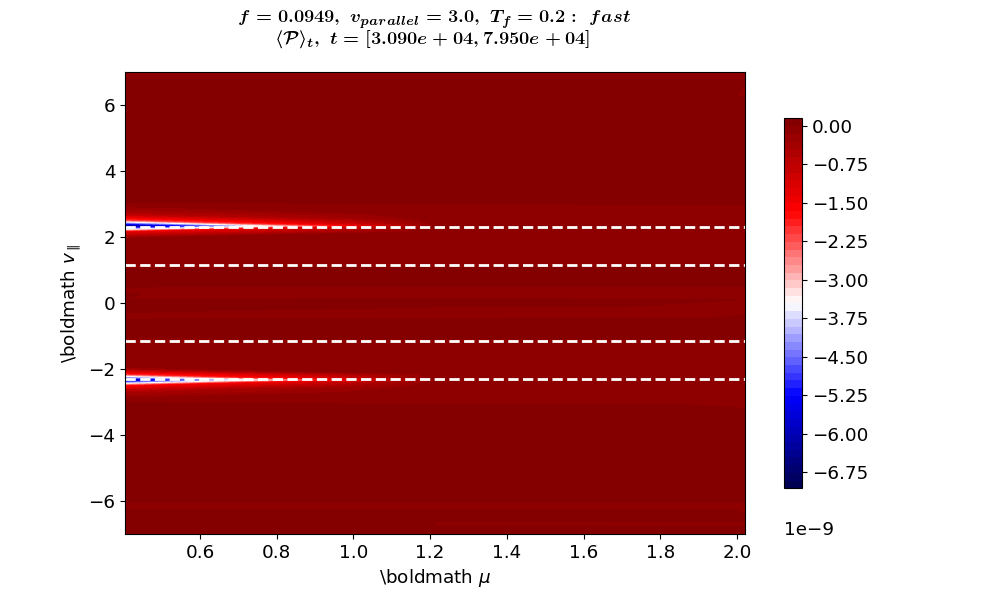

In [26]:
# *********************
# *** MPR: VELOCITY ***
# *********************
reload()

# species_name, flag_inv_peaks = 'deuterium', False
species_name, flag_inv_peaks = 'fast', True

s1 = 0.50
# dd_current, gam_w, tit_proj = dict(b025_v6_T04), 2.438e-03, \
#     'ES\ EGAMb:\ \rho_{f} = 0.25,\ v_{parallel} = 6.0,\ T_f = 0.4:\ '
# dd_current, gam_w, tit_proj = dict(b025_v3_T02), 1.082e-03, \
#     'f = 0.0949,\ v_{parallel} = 3.0,\ T_f = 0.2:\ '
dd_current, gam_w, tit_proj = dict(b025_f0004), 2.978e-03, \
    'f = 0.004,\ v_{parallel} = 8.0,\ T_f = 1.0:\ '

# t_int_start, t_int_end = 3.12e4, 3.90e4 
t_int_start, t_int_end = 3.09e4, 7.95e4 
tmin, tmax = 3e4, 8e4  
n_samples, min_gam_n_periods = 100, 3

n_vpar_res = 2
mu_plot, vpar_plot = [0, 2.5], [-7, 7]
tit_vmu = [
    tit_proj + species_name, '\langle\mathcal{P}\\rangle_{t},\ ' +  
    't = [{:0.3e}, {:0.3e}]'.format(t_int_start, t_int_end)
]

oo_wg = {
    # work and calculation time domain
    't_work': [tmin, tmax], 
    'flag_naive_t_peaks': False,
    'naive_n_periods': 4,
    'flag_inv_peaks': flag_inv_peaks,
    'gam-w': gam_w,  # normalization is always [wc]
    's1': s1,
    # calculate confidence intervals
    'flag_stat': False,
    'n_samples': n_samples,
    'min_gam_n_periods': min_gam_n_periods,
}
oo_plot = {
    't_plot': oo_wg['t_work'],
    'flag_norm': False,
    'flag_semilogy': True,
    'flag_pass_trap_cone': False,
    'mu_plot': mu_plot, 'vpar_plot': vpar_plot,
    'n_vpar_res' : n_vpar_res,
    'tit_vmu': tit_vmu,
}
oo_vars = {
    'sel_species': species_name,
    't_int': [t_int_start, t_int_end]
}

common.MPR_gamma_velocity_domains(dd_current, {}, oo_vars, oo_wg, oo_plot)

<IPython.core.display.Javascript object>


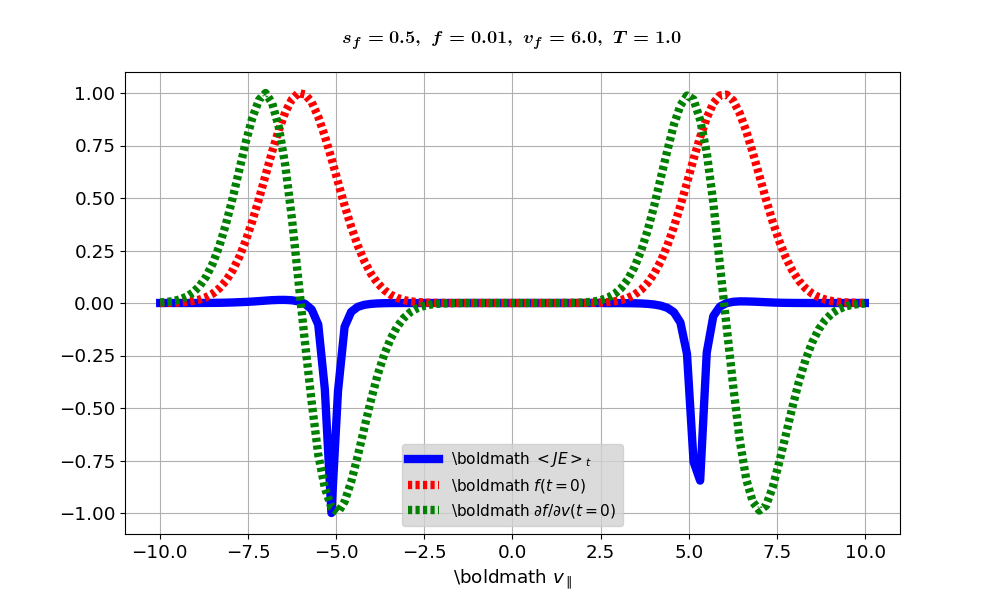

In [59]:
# **************************
# *** PLOT: <JE(vpar)>_t ***
# **************************
reload()

species_name = 'fast'

# dd_current, tit_plot = dict(b025_v6_T04), 's_f = 0.5,\ f = 0.01,\ v_f = 6.0,\ T = 0.4:\ ' + species_name
# dd_current, tit_plot = dict(b025_v6_T06), 's_f = 0.5,\ f = 0.01,\ v_f = 6.0,\ T = 0.6:\ ' + species_name
# dd_current, tit_plot = dict(b025_v6_T08), 's_f = 0.5,\ f = 0.01,\ v_f = 6.0,\ T = 0.8:\ ' + species_name
dd_current, tit_plot = dict(b025_v6_T1),  's_f = 0.5,\ f = 0.01,\ v_f = 6.0,\ T = 1.0:\ ' + species_name

t_av = [3.1e4, 7.9e4]

oo_vpar = {
    'ovars': [
        ['mpr',                    'je', species_name],
        ['distribution',     'f_vel_1d', species_name],
        ['distribution', 'df_vel_1d-dv', species_name],
    ],
    'avrs': [
        ['tvpar', 'mean-t', [t_av]],
        ['tvpar', 'point-t', [0.0]],
        ['tvpar', 'point-t', [0.0]],
    ],
    'dds': [dd_current]*3,
    'stys': ['-', ':', ':'],
    'labx': 'v_{\parallel}',
    'var_legs1': ['<JE>_t'],
    'var_legs2': ['f(t=0)'],
    'var_legs3': ['\partial f/\partial v (t=0)'],
#     'var_legs2': ['dt=10'],
#     'var_legs3': ['dt=20'],
     'x_start': -10, 'x_end': 10,
    'flag_norm': True,
    'tit_plot': tit_plot
}
common.plot_vars_1d(oo_vpar)

In [20]:
from ip_projects import NLED_scans

<IPython.core.display.Javascript object>


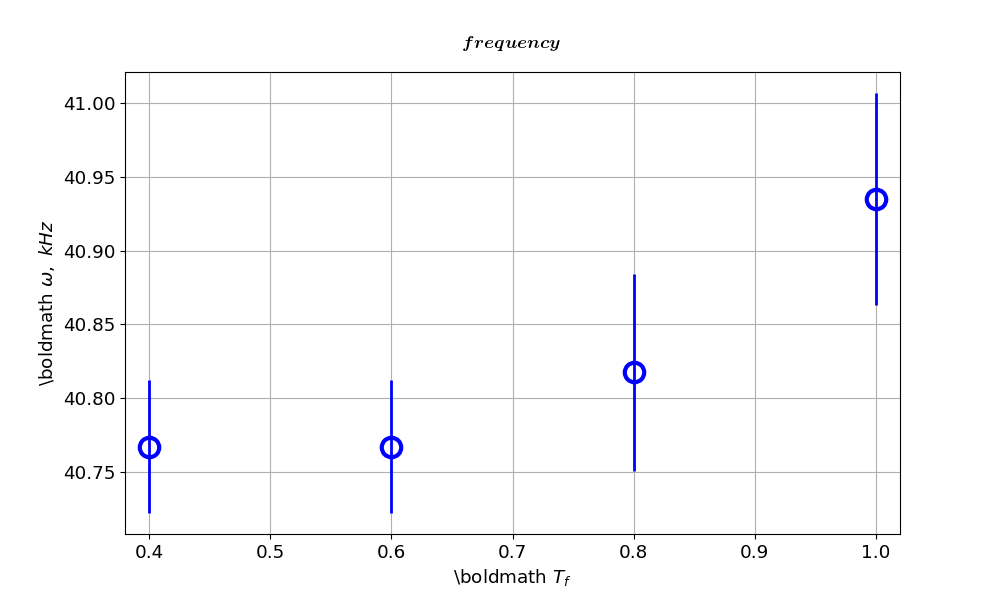

<IPython.core.display.Javascript object>


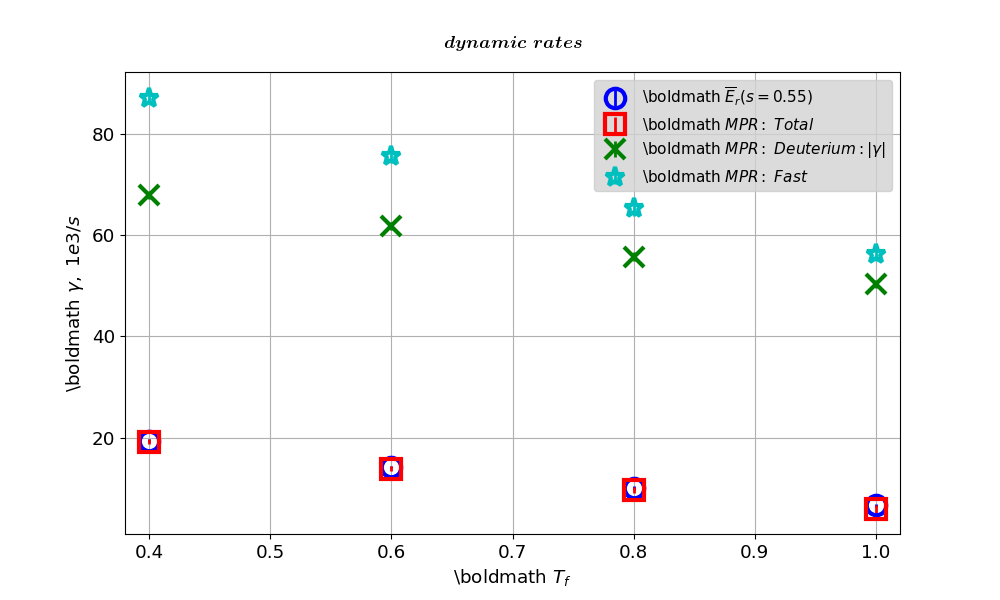

In [46]:
# **********************
# *** SCAN ON F_PART ***
# **********************
mix.reload_module(NLED_scans)
NLED_scans.es_egam_Tf_scan({'sel_norm': 'khz', 'dd': b025_v6_T1})

In [1]:
1./0.000272

3676.470588235294